In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

We will import more libraries/dependencies as per needed further in the code

In [2]:
park = pd.read_csv(r"better_data.csv")
park.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
park.drop(columns=['test_time'], inplace=True)

In [4]:
print(park['DFA'].max(), " ", park['DFA'].min())

0.8656   0.51404


## Important Parameters in our Dataset

Jitter:

Definition: Jitter is a measure of the frequency variation in consecutive periods of a sound waveform.
In the Dataset: The dataset includes several jitter-related features, such as Jitter(%), Jitter(Abs), Jitter:RAP (Relative Average Perturbation), Jitter:PPQ5 (Five-Point Period Perturbation Quotient), and Jitter:DDP (Jitter:RAP * 3).

Shimmer:

Definition: Shimmer is a measure of the amplitude variation in consecutive periods of a sound waveform.
In the Dataset: The dataset includes several shimmer-related features, such as Shimmer, Shimmer(dB) (Shimmer in decibels), Shimmer:APQ3 (Amplitude Perturbation Quotient, three-point), Shimmer:APQ5 (Amplitude Perturbation Quotient, five-point), Shimmer:APQ11 (Amplitude Perturbation Quotient, eleven-point), and Shimmer:DDA (Shimmer:APQ11 * 3)

Total UPDRS (Unified Parkinson's Disease Rating Scale):

Definition: The UPDRS is a widely used rating scale that assesses the severity of Parkinson's disease. The total UPDRS is the sum of scores from various sections of the UPDRS, including assessments of mentation, behavior, mood, activities of daily living, and motor function.
In the Dataset: The dataset includes a column named "total_UPDRS," which represents the total UPDRS score for each individual.
Motor UPDRS (Motor Section of UPDRS):

Definition: The motor section of the UPDRS specifically focuses on evaluating motor symptoms associated with Parkinson's disease, including tremors, rigidity, bradykinesia, and posture instability.
In the Dataset: The dataset includes a column named "motor_UPDRS," which represents the score related to the motor symptoms in the UPDRS for each individual.

In [5]:
park['age'].value_counts().unique

<bound method Series.unique of age
58    429
66    422
65    407
73    385
57    385
68    317
72    310
59    299
75    286
67    283
74    271
55    267
49    256
62    236
78    168
71    165
63    156
60    156
61    150
76    144
85    142
56    140
36    101
Name: count, dtype: int64>

In [6]:
park.shape

(5875, 21)

In [7]:
park.isna().sum()

subject#         0
age              0
sex              0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [8]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   motor_UPDRS    5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [9]:
# park['status'].value_counts()

In [10]:
# X = park.drop(columns = ['status', 'name'])

In [11]:
# X = park.drop('status', 'name', axis=1)
# Y = park['status']

<Axes: xlabel='Jitter(%)', ylabel='Shimmer'>

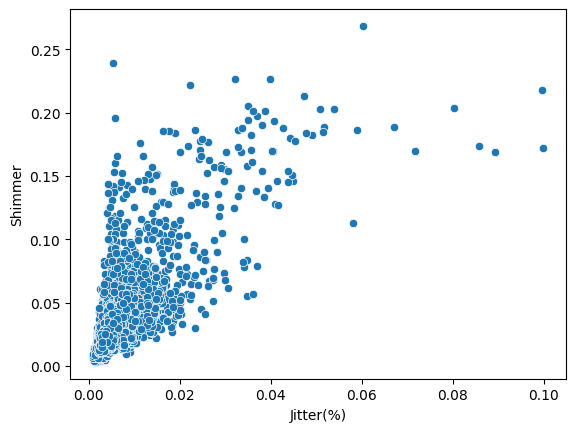

In [12]:
import seaborn as sns

sns.scatterplot(data=park, x='Jitter(%)', y='Shimmer')

In [13]:
# sns.scatterplot(data = park, x = 'subject#', y = 'combined_UPDRS')

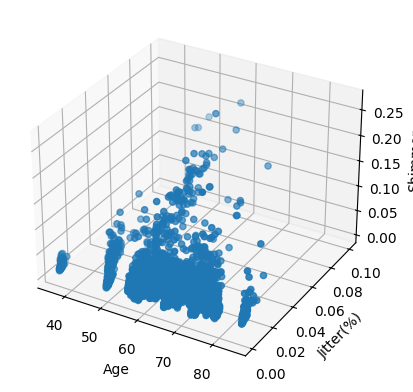

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(park['age'], park['Jitter(%)'], park['Shimmer'])

ax.set_xlabel('Age')
ax.set_ylabel('Jitter(%)')
ax.set_zlabel('Shimmer')

plt.show()

<Axes: xlabel='sex', ylabel='Jitter(%)'>

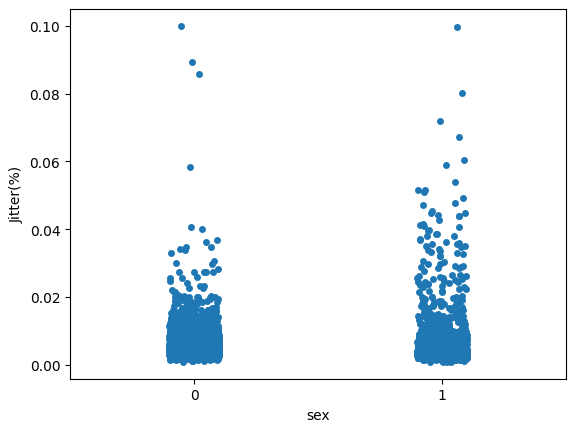

In [15]:
sns.stripplot(data = park, x = 'sex', y = 'Jitter(%)')

<Axes: xlabel='age', ylabel='Jitter(%)'>

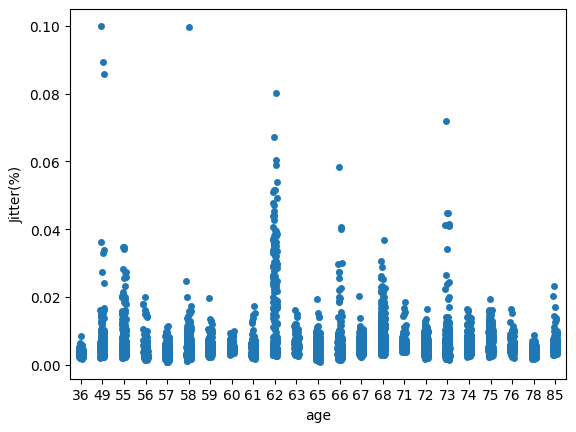

In [16]:
sns.stripplot(data = park, x = 'age', y = 'Jitter(%)')

<Axes: xlabel='sex', ylabel='age'>

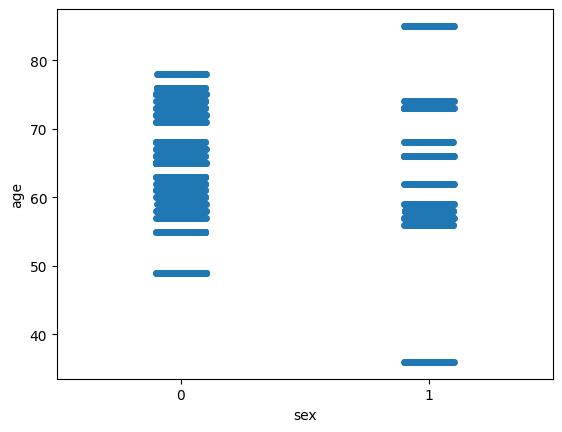

In [17]:
sns.stripplot(data  =park, x = 'sex', y = 'age')

Below is the pairplot between age, sex, motor_UPDRS and total_UPDRS

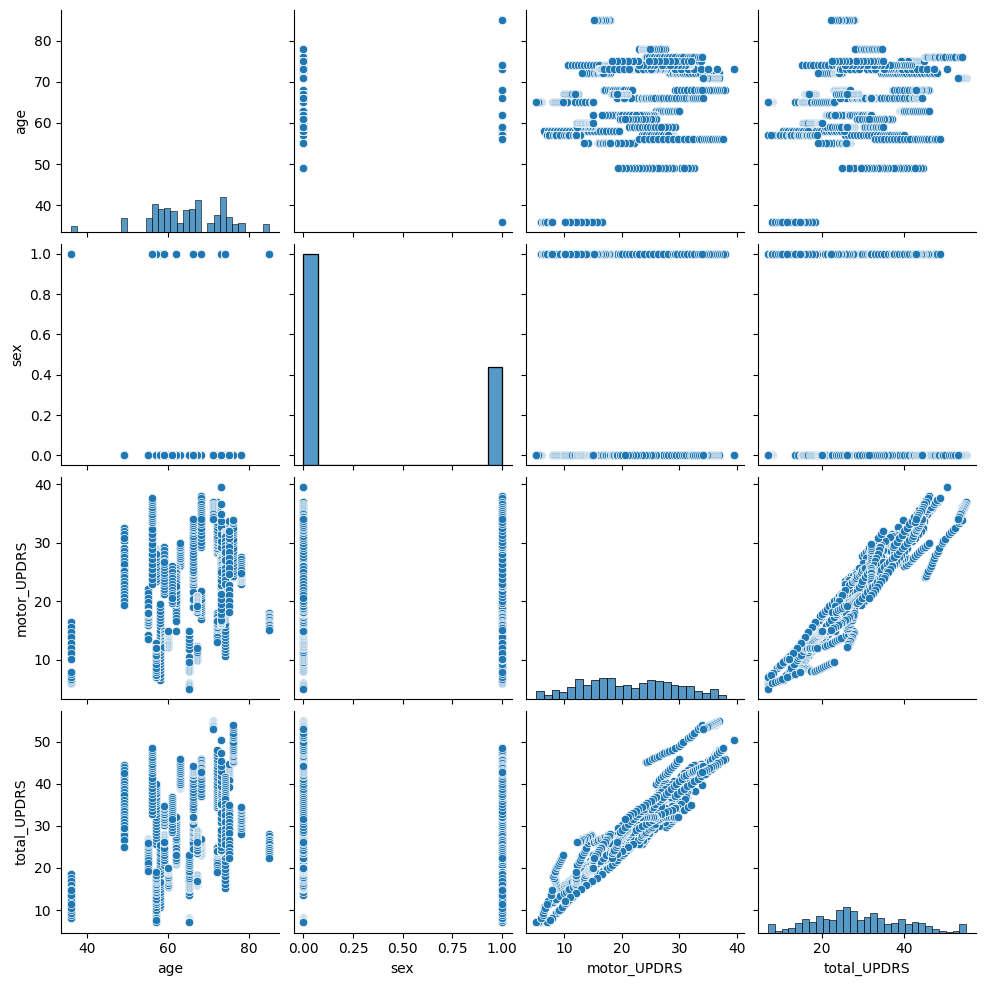

In [18]:
sns.pairplot(park[['age', 'sex', 'motor_UPDRS', 'total_UPDRS']])
plt.show()

## Correlation

Here we visualize the correalation between different variable

In [19]:
corr = park.corr()

corr

,subject#,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,0.120350,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,0.010258,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,0.076703,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
motor_UPDRS,0.252919,0.273665,-0.031205,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,0.072698,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.120350,0.010258,0.076703,0.072698,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,...,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660


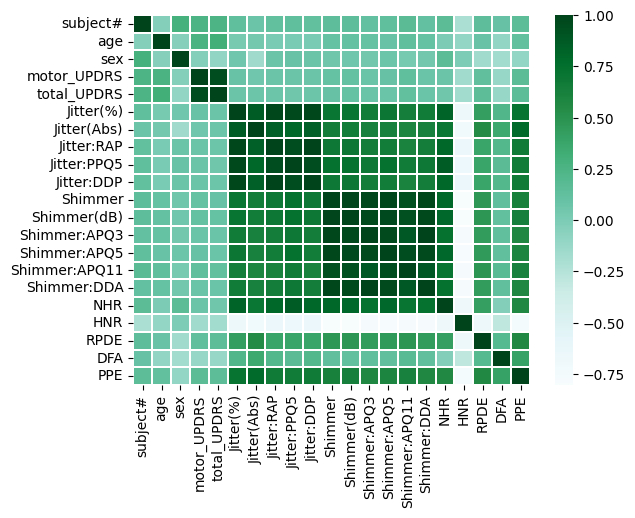

In [20]:

cmap = sns.color_palette("BuGn", as_cmap=True)
# cmap = cmap.reversed()
sns.heatmap(corr, fmt = ".2f", linewidth = 0.1, cmap=cmap)
plt.show()

We can see that all the jitter variables highly correlate with Shimmer variables.

Since the correlation between out two target variables, total_UPDRS and motor_UPDRS is very high, we can combine them into one, using feature enggineering, as follows:

In [21]:
park['combined_UPDRS'] = (park['total_UPDRS']+park['motor_UPDRS'])/2
park = park.drop(columns = ['total_UPDRS', 'motor_UPDRS'])

park.head(100)

,subject#,age,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,combined_UPDRS
0,1,72,0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,31.2985
1,1,72,0,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,31.6705
2,1,72,0,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,32.0420
3,1,72,0,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,32.3575
4,1,72,0,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,32.7810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,72,0,0.00493,0.000027,0.00196,0.00237,0.00588,0.01735,0.183,0.00843,0.01012,0.01403,0.02528,0.023882,24.519,0.51510,0.54723,0.21213,40.7615
96,1,72,0,0.00296,0.000018,0.00086,0.00120,0.00259,0.02135,0.197,0.00889,0.01143,0.01986,0.02668,0.005710,25.696,0.52484,0.57219,0.15257,41.3055
97,1,72,0,0.00285,0.000016,0.00113,0.00141,0.00339,0.01432,0.134,0.00764,0.00850,0.01222,0.02291,0.004805,26.264,0.42922,0.54986,0.15523,41.8500
98,1,72,0,0.00547,0.000024,0.00234,0.00268,0.00701,0.01991,0.267,0.00912,0.00969,0.01333,0.02735,0.017361,24.543,0.52026,0.53879,0.29135,42.4740


In [22]:
# prompt: sort the df based on combined_updrs

park.sort_values(by=['combined_UPDRS'], inplace=True)
park.head(25)


,subject#,age,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,combined_UPDRS
2541,18,65,0,0.00450,0.000028,0.00236,0.00233,0.00707,0.02199,0.191,0.01155,0.01237,0.01603,0.03465,0.023211,25.577,0.50655,0.62207,0.14914,6.01885
2499,18,65,0,0.00372,0.000028,0.00184,0.00167,0.00552,0.01698,0.164,0.00754,0.00868,0.01264,0.02262,0.009042,26.346,0.36347,0.67990,0.16024,6.01885
2520,18,65,0,0.00285,0.000021,0.00131,0.00171,0.00393,0.01882,0.167,0.00909,0.01073,0.01591,0.02728,0.009729,26.763,0.39404,0.63078,0.14153,6.01885
2436,18,65,0,0.00520,0.000040,0.00219,0.00276,0.00658,0.02191,0.189,0.01042,0.01327,0.01841,0.03126,0.017852,23.065,0.53743,0.70586,0.21323,6.01890
2457,18,65,0,0.00336,0.000024,0.00144,0.00192,0.00432,0.02842,0.242,0.01299,0.01511,0.02280,0.03896,0.014654,25.338,0.57389,0.65187,0.16944,6.01890
2478,18,65,0,0.00413,0.000028,0.00205,0.00214,0.00616,0.01543,0.139,0.00717,0.00808,0.01207,0.02152,0.014056,27.479,0.37811,0.62777,0.10806,6.01890
2498,18,65,0,0.00429,0.000029,0.00210,0.00237,0.00629,0.02210,0.210,0.01035,0.01185,0.01592,0.03105,0.013138,22.929,0.44845,0.66905,0.18988,6.06875
2519,18,65,0,0.00665,0.000041,0.00377,0.00314,0.01131,0.03234,0.295,0.01789,0.01839,0.02251,0.05368,0.015050,20.339,0.40974,0.67668,0.17117,6.06875
2540,18,65,0,0.00382,0.000023,0.00191,0.00199,0.00574,0.01819,0.155,0.00923,0.01049,0.01195,0.02770,0.011325,23.763,0.41835,0.65168,0.11594,6.06875
2435,18,65,0,0.00507,0.000034,0.00200,0.00238,0.00601,0.03903,0.349,0.01967,0.02541,0.03426,0.05902,0.017699,23.404,0.50003,0.66764,0.21611,6.06880


In [23]:
print(park['combined_UPDRS'].min(),", ", park['combined_UPDRS'].max())

6.0188500000000005 ,  45.989999999999995


<Axes: xlabel='age', ylabel='combined_UPDRS'>

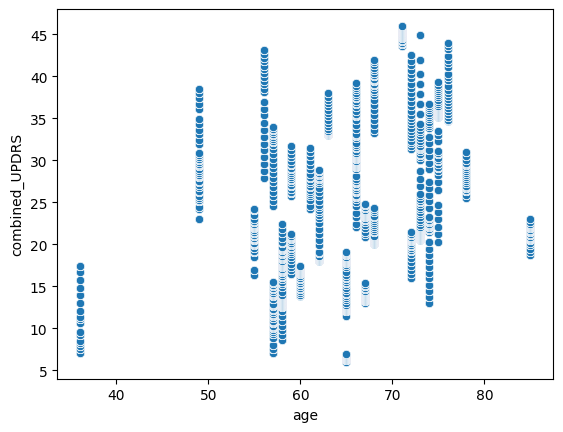

In [24]:
sns.scatterplot(data = park, x = 'age', y = 'combined_UPDRS')

In [25]:
Y = park['combined_UPDRS']
X = park.drop(columns  = ['combined_UPDRS', 'subject#'])

## PCA (Principal Component Analysis)

PCA reduces the number of variables of a data set, while preserving as much information as possible

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90) #0.90 means I'm asking PCA to give me 90% of the information, i don't care how many PCs you have, just retain 90% of information.
# Fit and transform your data
X_pca = pca.fit_transform(X)
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)



Explained variance ratio: [0.80889399 0.18849324]


In [27]:
X.shape

(5875, 18)

In [28]:
X_pca.shape

(5875, 2)

As we see, PCA reduced our dataset with 15 features to just 1 feature.
This might not be very beneficial, beacause PCA is used for dimensionality reduction, and 15 features is not a big dimension.
So, we will avoid PCA as for now.

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
print("MSE_LR = ",mean_squared_error(Y_test, lr.predict(X_test)))
print("RMSE_LR = ",np.sqrt(mean_squared_error(Y_test, lr.predict(X_test))))
print("MAE_LR = ",mean_absolute_error(Y_test, lr.predict(X_test)))
print("R2_LR = ",r2_score(Y_test, lr.predict(X_test)))


MSE_LR =  73.65538789869736
RMSE_LR =  8.58227172132748
MAE_LR =  7.189449441078518
R2_LR =  0.17261479947417924


## Elastic Net Regressor

In [32]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train,Y_train)

ElasticNet()

In [33]:
print("MSE_EN = ",mean_squared_error(Y_test, en.predict(X_test)))
print("RMSE_EN = ",np.sqrt(mean_squared_error(Y_test, en.predict(X_test))))
print("MAE_EN = ",mean_absolute_error(Y_test, en.predict(X_test)))
print("R2_EN = ",r2_score(Y_test, en.predict(X_test)))

MSE_EN =  79.04996051969029
RMSE_EN =  8.891004471919373
MAE_EN =  7.5340815351017865
R2_EN =  0.11201652313477428


R2 score for Elastic Net is closer to 0, and mean absolute and mean squared, both error are also considerably higher for elastic net.

In conclusion, Elastic Net is not a good measure for our dataset

## Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
print("MSE_RFR = ",mean_squared_error(Y_test, rfr.predict(X_test)))
print("RMSE_RFR = ",np.sqrt(mean_squared_error(Y_test, rfr.predict(X_test))))
print("MAE_RFR = ",mean_absolute_error(Y_test, rfr.predict(X_test)))
print("R2_RFR = ",r2_score(Y_test, rfr.predict(X_test)))

MSE_RFR =  8.476749263080393
RMSE_RFR =  2.9114857483903975
MAE_RFR =  2.0604101653431646
R2_RFR =  0.9047790380455669


R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit.

R² closer to 1 indicates  good fit, meaning the model is able to explain the variance better.

## Metrics


Before combining all jitter variables:

MSE_LR =  70.60733594551309
RMSE_LR =  8.402817143405722
MAE_LR =  7.019038615554898
R2_LR =  0.1684497596409289

MSE_EN =  75.40984564673356
RMSE_EN =  8.68388424881018
MAE_EN =  7.386348448565772
R2_EN =  0.1118900829033953

MSE_RFR =  2.1071390993467753
RMSE_RFR =  1.4515988079861375
MAE_RFR =  0.6778182274532043
R2_RFR =  0.9751839946789105

After combining all jitter variables, LR and EN metrics remain same, but RFR metrics worsen slightly, so we will avoid taking average of all jitter variables and combing them into one

MSE_LR =  70.60733594551309
RMSE_LR =  8.402817143405722
MAE_LR =  7.019038615554898
R2_LR =  0.1684497596409289

MSE_EN =  75.40984564673356
RMSE_EN =  8.68388424881018
MAE_EN =  7.386348448565772
R2_EN =  0.1118900829033953

MSE_RFR =  2.941390993467753
RMSE_RFR =  1.7415988079861375
MAE_RFR =  0.7078182274532043
R2_RFR =  0.9621839946789105

After using PCA, and using X_pca for training our data, the metrics come out to be:

MSE_LR =  84.40199403224499
RMSE_LR =  9.187055786934408
MAE_LR =  7.7413866338340735
R2_LR =  0.005988577752617408

MSE_EN =  84.40313712026162
RMSE_EN =  9.18711799860335
MAE_EN =  7.740798931123667
R2_EN =  0.0059751154812789364

MSE_RFR =  13.392135907713705
RMSE_RFR =  3.659526732750248
MAE_RFR =  1.5755579988655728
R2_RFR =  0.8422793653966156

In [36]:
print(Y.shape)
print(X.shape)

(5875,)
(5875, 18)


In [37]:
importances = rfr.feature_importances_
importances

array([0.65428068, 0.07345986, 0.00556954, 0.02861115, 0.00488952,
       0.00812555, 0.00689655, 0.00736768, 0.00650085, 0.00648048,
       0.00842073, 0.00970506, 0.00745672, 0.01446148, 0.0161271 ,
       0.02039172, 0.09813537, 0.02311995])

In [38]:
importances.shape

(18,)

In [39]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)


         Features  Importance
0             age    0.654281
16            DFA    0.098135
1             sex    0.073460
3     Jitter(Abs)    0.028611
17            PPE    0.023120
15           RPDE    0.020392
14            HNR    0.016127
13            NHR    0.014461
11  Shimmer:APQ11    0.009705
10   Shimmer:APQ5    0.008421
5     Jitter:PPQ5    0.008126
12    Shimmer:DDA    0.007457
7         Shimmer    0.007368
6      Jitter:DDP    0.006897
8     Shimmer(dB)    0.006501
9    Shimmer:APQ3    0.006480
2       Jitter(%)    0.005570
4      Jitter:RAP    0.004890


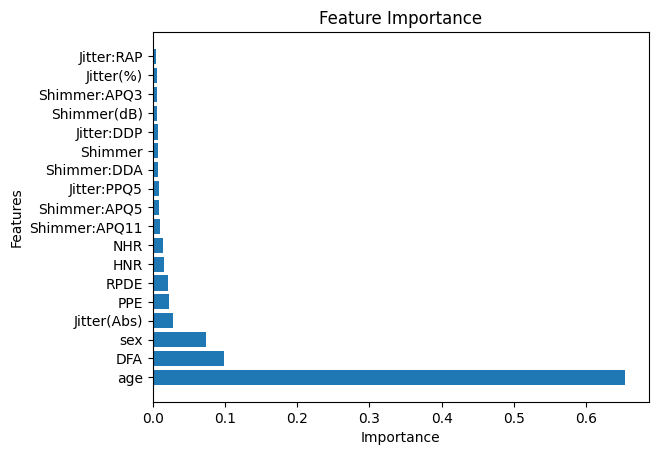

In [40]:
plt.barh(feature_importances['Features'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

As we can seee from the above graph, in the given dataset, the feature with highest importance is age. Actually it makes sense too, since it's true that PD is more commonly diagnosed in older individuals

In [41]:
# Identify the most important features
top_features = feature_importances.head(5)['Features'].tolist()
print(top_features)

# Select only the top features for modeling
X_top_features = X[top_features]

# Retrain the model using only the top features
X_train_top, X_test_top, Y_train, Y_test = train_test_split(X_top_features, Y, test_size=0.3, random_state=42)

rfr_top = RandomForestRegressor()
rfr_top.fit(X_train_top, Y_train)

# Evaluate the model with top features
print("MSE_RFR_TopFeatures = ", mean_squared_error(Y_test, rfr_top.predict(X_test_top)))
print("RMSE_RFR_TopFeatures = ", np.sqrt(mean_squared_error(Y_test, rfr_top.predict(X_test_top))))
print("MAE_RFR_TopFeatures = ", mean_absolute_error(Y_test, rfr_top.predict(X_test_top)))
print("R2_RFR_TopFeatures = ", r2_score(Y_test, rfr_top.predict(X_test_top)))



['age', 'DFA', 'sex', 'Jitter(Abs)', 'PPE']
MSE_RFR_TopFeatures =  9.587196886597436
RMSE_RFR_TopFeatures =  3.0963198940996772
MAE_RFR_TopFeatures =  2.2138022603516734
R2_RFR_TopFeatures =  0.8923051653816865


Before using feature importance:

MSE_RFR =  2.1071390993467753
RMSE_RFR =  1.4515988079861375
MAE_RFR =  0.6778182274532043
R2_RFR =  0.9751839946789105

After using feature importance with top 5 features:

MSE_RFR_TopFeatures =  1.6492246470676404
RMSE_RFR_TopFeatures =  1.2842214166831358
MAE_RFR_TopFeatures =  0.46437770476460627
R2_RFR_TopFeatures =  0.9805769027635669

If we use 4, or 6 top features, our accuracy decreases, so the best parameter is 5

In [42]:
import pandas as pd
from tabulate import tabulate

# Metrics before combining UPDRS scores
scenario_names_before_combining = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_before_combining = [70.61, 75.41, 2.11]
rmse_before_combining = [8.40, 8.68, 1.45]
mae_before_combining = [7.02, 7.39, 0.68]
r2_before_combining = [0.17, 0.11, 0.98]

# Metrics after combining UPDRS scores
scenario_names_after_combining = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_after_combining = [70.61, 75.41, 2.94]
rmse_after_combining = [8.40, 8.68, 1.74]
mae_after_combining = [7.02, 7.39, 0.71]
r2_after_combining = [0.17, 0.11, 0.96]

# Metrics after using PCA
scenario_names_after_pca = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_after_pca = [84.40, 84.40, 13.39]
rmse_after_pca = [9.19, 9.19, 3.66]
mae_after_pca = [7.74, 7.74, 1.58]
r2_after_pca = [0.01, 0.01, 0.84]

# Metrics after using Feature Importance
scenario_names_after_feature_importance = ['Random Forest (All Features)', 'Random Forest (Top 5 Features)']
mse_after_feature_importance = [2.94, 1.65]
rmse_after_feature_importance = [1.74, 1.28]
mae_after_feature_importance = [0.71, 0.46]
r2_after_feature_importance = [0.96, 0.98]

# Create DataFrames
df_before_combining = pd.DataFrame({
    'Scenario': scenario_names_before_combining,
    'MSE': mse_before_combining,
    'RMSE': rmse_before_combining,
    'MAE': mae_before_combining,
    'R2': r2_before_combining
})

df_after_combining = pd.DataFrame({
    'Scenario': scenario_names_after_combining,
    'MSE': mse_after_combining,
    'RMSE': rmse_after_combining,
    'MAE': mae_after_combining,
    'R2': r2_after_combining
})

df_after_pca = pd.DataFrame({
    'Scenario': scenario_names_after_pca,
    'MSE': mse_after_pca,
    'RMSE': rmse_after_pca,
    'MAE': mae_after_pca,
    'R2': r2_after_pca
})

df_after_feature_importance = pd.DataFrame({
    'Scenario': scenario_names_after_feature_importance,
    'MSE': mse_after_feature_importance,
    'RMSE': rmse_after_feature_importance,
    'MAE': mae_after_feature_importance,
    'R2': r2_after_feature_importance
})

# Display the tables
print("Metrics Before Combining UPDRS Scores:")
print(tabulate(df_before_combining, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Combining UPDRS Scores:")
print(tabulate(df_after_combining, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Using PCA:")
print(tabulate(df_after_pca, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Using Feature Importance:")
print(tabulate(df_after_feature_importance, headers='keys', tablefmt='pretty', showindex=False))


Metrics Before Combining UPDRS Scores:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 70.61 | 8.4  | 7.02 | 0.17 |
|    Elastic Net    | 75.41 | 8.68 | 7.39 | 0.11 |
|   Random Forest   | 2.11  | 1.45 | 0.68 | 0.98 |
+-------------------+-------+------+------+------+

Metrics After Combining UPDRS Scores:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 70.61 | 8.4  | 7.02 | 0.17 |
|    Elastic Net    | 75.41 | 8.68 | 7.39 | 0.11 |
|   Random Forest   | 2.94  | 1.74 | 0.71 | 0.96 |
+-------------------+-------+------+------+------+

Metrics After Using PCA:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 84.4  |

## Observations


PCA (Principal Component Analysis):

I observed that applying PCA to reduce the dimensionality from 15 features to 1 might not be very beneficial. It seems that PCA is more effective when dealing with a larger number of features.


Combining UPDRS Scores:

I decided to combine "total_UPDRS" and "motor_UPDRS" into "combined_UPDRS" as a feature engineering step. This simplifies the target variable for regression modeling.


Model Evaluation:

I used evaluation metrics (MSE, RMSE, MAE, R2) to gain insights into the performance of different regression models, such as Linear Regression, Elastic Net, and Random Forest. Random Forest Regression appeared to perform well, especially based on the R2 score.


Feature Importance:

Analyzing feature importance, particularly the bar chart, helped me identify the features that contribute the most to the model's predictions. Age stood out as the most important feature, aligning with the understanding that Parkinson's disease is more common in older individuals.

## Best performing scenario till now: Random Forest Regressor, after applying Feature Importance


Visualization:

I created scatter plots, strip plots, and pair plots to visually represent relationships between different variables. These visualizations are crucial for my understanding of the patterns in the data.


Decision Tree Visualization:

Visualizing decision trees from the random forest models provided insights into how the model makes predictions. This was helpful for interpretability.


Model Comparison:

I compared the performance of Linear Regression, Elastic Net, and Random Forest Regression. It's important to consider the trade-offs between model complexity and performance.


Avoiding Feature Combination:

I chose not to combine all jitter variables into one, considering the slight degradation in the performance of the Random Forest Regressor.

In [43]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import graphviz

for i in range(1):
    tree = rfr.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=6,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [44]:
! pip install praat-parselmouth

In [45]:
! pip install nolds

In [46]:
import numpy as np
import librosa

def calculate_dfa_exponent_1(audio_file_path, window_size=500):
    # Load audio file and extract waveform and sampling rate
    audio_data, sr = librosa.load(audio_file_path)

    # Calculate integrated series (cumulative sum of detrended audio data)
    integrated_series = np.cumsum(audio_data - np.mean(audio_data))

    # Calculate RMS values over windows of specified size
    num_windows = len(integrated_series) // window_size
    windows = np.array_split(integrated_series[:num_windows * window_size], num_windows)
    window_rms = [np.sqrt(np.mean(window**2)) for window in windows]

    # Compute log-log relationship to estimate DFA exponent (alpha)
    n_values = np.arange(1, num_windows + 1) * window_size
    F_n_values = np.array(window_rms)
    log_n = np.log(n_values)
    log_F_n = np.log(F_n_values)
    
    # Use linear regression to estimate scaling exponent (alpha)
    slope, _ = np.polyfit(log_n, log_F_n, 1)
    alpha = slope  # DFA exponent (scaling exponent)
    
    return alpha


In [47]:
audio_file_path = './PD_AH/AH_545643618-82A143AC-B643-4273-A923-C42A83AEEC5F.wav'
alpha = calculate_dfa_exponent_1(audio_file_path,1000)

In [48]:
! pip install fathon

In [49]:
import glob
import numpy as np
import pandas as pd
import parselmouth

from parselmouth.praat import call
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)
    meanF0 = call(pitch, "Get mean", 0, 0, unit)
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
    ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
    ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
    localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)


    return meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer


file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
localJitter_list = []
localabsoluteJitter_list = []
rapJitter_list = []
ppq5Jitter_list = []
ddpJitter_list = []
localShimmer_list = []
localdbShimmer_list = []
apq3Shimmer_list = []
aqpq5Shimmer_list = []
apq11Shimmer_list = []
ddaShimmer_list = []

for wave_file in glob.glob('./PD_AH/AH_545643618-82A143AC-B643-4273-A923-C42A83AEEC5F.wav'):
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file)
    mean_F0_list.append(meanF0)
    sd_F0_list.append(stdevF0)
    hnr_list.append(hnr)
    localJitter_list.append(localJitter)
    localabsoluteJitter_list.append(localabsoluteJitter)
    rapJitter_list.append(rapJitter)
    ppq5Jitter_list.append(ppq5Jitter)
    ddpJitter_list.append(ddpJitter)
    localShimmer_list.append(localShimmer)
    localdbShimmer_list.append(localdbShimmer)
    apq3Shimmer_list.append(apq3Shimmer)
    aqpq5Shimmer_list.append(aqpq5Shimmer)
    apq11Shimmer_list.append(apq11Shimmer)
    ddaShimmer_list.append(ddaShimmer)
df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list, localJitter_list, localabsoluteJitter_list, rapJitter_list, ppq5Jitter_list, ddpJitter_list, localShimmer_list, localdbShimmer_list, apq3Shimmer_list, aqpq5Shimmer_list, apq11Shimmer_list, ddaShimmer_list]),
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR', 'localJitter', 'localabsoluteJitter', 'rapJitter',
                                        'ppq5Jitter', 'ddpJitter', 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'apq5Shimmer',
                                        'apq11Shimmer', 'ddaShimmer'])

df.to_csv("processed_results.csv", index=False)

df

,voiceID,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer
0,./PD_AH/AH_545643618-82A143AC-B643-4273-A923-C...,157.9328401584956,5.835948188382639,18.171925135568674,0.004556460786087948,2.8844707304924805e-05,0.0021954336831804906,0.0024638025013693954,0.006586301049541472,0.06692030460761882,0.6059753432695119,0.03512699712612484,0.0450602173363847,0.05950468421692837,0.10538099137837452


In [50]:
model = rfr_top
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)
    meanF0 = call(pitch, "Get mean", 0, 0, unit)
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)

    return hnr, localabsoluteJitter


def predict_jitter_shimmer(audio_file):
    age_ip = input("Enter your age: ")
    sex_ip = input("Enter your sex: (0 for male, 1 for female): ")

    sound = parselmouth.Sound(audio_file)
    hnr, localabsoluteJitter = measurePitch(sound, 75, 500, "Hertz")
    top_5 = ['age', 'DFA', 'sex', 'Jitter(Abs)', 'HNR']
    features = [age_ip, alpha, sex_ip, localabsoluteJitter, hnr]  # Assuming alpha is defined somewhere
    model = pickle.load(open(filename, 'rb'))
    prediction = model.predict([features])
    return prediction


audio_file = './PD_AH/AH_545789671-794D2256-DDFF-4009-8BA8-8A306C8FA14F.wav'
prediction = predict_jitter_shimmer(audio_file)
print(prediction)


Enter your age:  20
Enter your sex: (0 for male, 1 for female):  0


[11.9334005]


C:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
if prediction > 29:
    print("person has parkinson")
else:
    print("person does not have parkinson")
    


person does not have parkinson


In [52]:
def calculate_nhr_ppe(audio_file):
    sound = parselmouth.Sound(audio_file)
    
    # NHR Calculation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    nhr = call(harmonicity, "Get mean", 0, 0)
    
    # PPE Calculation
    pointProcess = call(sound, "To PointProcess (periodic, cc)", 75, 500)
    ppe = call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    
    return nhr, ppe

# Example usage:
audio_file = './HC_AH/AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav'
nhr, ppe = calculate_nhr_ppe(audio_file)
print("NHR:", nhr)
print("PPE:", ppe)

NHR: 11.766848241448777
PPE: 0.12252741172887156


In [53]:
! pip install openpyxl

In [54]:
import os
import glob
import pandas as pd
import numpy as np
import parselmouth
import pickle
from parselmouth.praat import call
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

model = rfr_top
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

def list_audio_samples(folder_path):
    audio_samples = glob.glob(os.path.join(folder_path, "*.wav"))
    return audio_samples

folder_path = "./PD_AH"
audio_list = list_audio_samples(folder_path)

def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID)
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)
    meanF0 = call(pitch, "Get mean", 0, 0, unit)
    stdevF0 = call(pitch, "Get standard deviation", 0, 0, unit)
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    return hnr, localabsoluteJitter

def predict_jitter_shimmer(audio_list, excel_data):
    predictions = []
    model = pickle.load(open(filename, 'rb'))  
    pwpd_rows = excel_data[excel_data['Label'] == 'PwPD']
    
    for audio_file in audio_list:
        sound = parselmouth.Sound(audio_file)
        hnr, local_absolute_jitter = measurePitch(sound, 75, 500, "Hertz")
        file_name_1 = os.path.basename(audio_file)
        parts = file_name_1.split('.')
        file_name = parts[0]

        row = pwpd_rows.loc[pwpd_rows['Sample_ID'] == file_name]

        if not row.empty:
            age = row['Age'].values[0]
            sex = row['Sex'].values[0]
            if sex == 'M':
                sex = 0
            else:
                sex = 1
            features = [age, alpha, sex, local_absolute_jitter, hnr] 
            prediction = model.predict([features])
            predictions.append(prediction[0])  # Assuming the model returns a list/array, so taking the first element
    return predictions

excel_file_path = r"Demographics_age_sex.xlsx"

def load_excel_data(excel_file_path):
    try:
        df = pd.read_excel(excel_file_path)
    except PermissionError as e:
        print(f"Permission error: {e}")
        raise
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        raise
    except Exception as e:
        print(f"An error occurred: {e}")
        raise
    return df

excel_data = load_excel_data(excel_file_path)

def compute_threshold_pwPD(audio_samples, excel_data):
    predictions = predict_jitter_shimmer(audio_samples, excel_data)
    metrics_pwPD = []
    for i, prediction in enumerate(predictions):
        file_name = os.path.basename(audio_samples[i])
        parts = file_name.split('.')
        file_name = parts[0]

        row = excel_data.loc[excel_data['Sample_ID'] == file_name]
        if not row.empty:
            label = row['Label'].values[0]
            if label == 'PwPD':
                metrics_pwPD.append(prediction)
            elif label != 'HC':
                print(f"Unknown label '{label}' for file: {file_name}")
    if metrics_pwPD:
        threshold_pwPD = np.mean(metrics_pwPD)
    else:
        threshold_pwPD = None
    return threshold_pwPD

audio_samples = list_audio_samples(folder_path)
threshold_pwPD = compute_threshold_pwPD(audio_samples, excel_data)
print(f"The threshold value for PwPD is: {threshold_pwPD}")


The threshold value for PwPD is: 29.40858363750001
